In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(500)
#age of some people is not available ,so is the cabin number 
#head returns first 5 rows by default , if it is given number of rows in parameter then it returns that many number of rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.preprocessing import MinMaxScaler

feature_to_normalize = "Fare"

# Extract the chosen feature
feature_values = train_data[feature_to_normalize].values.reshape(-1, 1)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the feature values
normalized_values = scaler.fit_transform(feature_values)

# Update the DataFrame with normalized values
train_data[feature_to_normalize] = normalized_values
print("done")
from sklearn.preprocessing import MinMaxScaler

feature_to_normalize = "Fare"

# Extract the chosen feature
feature_values = test_data[feature_to_normalize].values.reshape(-1, 1)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the feature values
normalized_values = scaler.fit_transform(feature_values)

# Update the DataFrame with normalized values
test_data[feature_to_normalize] = normalized_values
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Assuming train_data and test_data are your DataFrames

# Impute missing values in the 'Age' column
column_name = 'Fare'
imputer = SimpleImputer(strategy='mean')

train_data[column_name] = imputer.fit_transform(train_data[[column_name]])
test_data[column_name] = imputer.transform(test_data[[column_name]])
column_name = 'Age'
imputer = SimpleImputer(strategy='mean')

train_data[column_name] = imputer.fit_transform(train_data[[column_name]])
test_data[column_name] = imputer.transform(test_data[[column_name]])

# Define features for training (exclude 'Survived' from features)
features = ["Pclass", "Sex", "SibSp", "Parch", "Fare","Age"]
X = pd.get_dummies(train_data[features])
y = train_data["Survived"]
#################################################
from sklearn.model_selection import GridSearchCV
"""
param_grid={
    'n_estimators': [175,225, 275],
    'max_depth': [4,5,6],
    'min_samples_split': [2, 5,10],
    
    'min_samples_leaf': [1,2,5]
}
"""
##try adding 
model = RandomForestClassifier(n_estimators = 180 , max_depth = 4 , min_samples_split = 2, min_samples_leaf = 1, random_state=42) #or use entropy in place of gini
#grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
#grid_search.fit(X, y)

#best_params = grid_search.best_params_
#print("Best ones: " , best_params )
#################################################
#Create and train the Random Forest model

model.fit(X, y)

# Prepare features for the test set
X_test = pd.get_dummies(test_data[features])
print(X_test)


# Make predictions
predictions = model.predict(X_test)

# Create a submission DataFrame
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# Save the submission to a CSV file
output.to_csv('submission.csv', index=False)
print("Your submission was saved")

done
     Pclass  SibSp  Parch      Fare        Age  Sex_female  Sex_male
0         3      0      0  0.015282  34.500000       False      True
1         3      1      0  0.013663  47.000000        True     False
2         2      0      0  0.018909  62.000000       False      True
3         3      0      0  0.016908  27.000000       False      True
4         3      1      1  0.023984  22.000000        True     False
..      ...    ...    ...       ...        ...         ...       ...
413       3      0      0  0.015713  29.699118       False      True
414       1      0      0  0.212559  39.000000        True     False
415       3      0      0  0.014151  38.500000       False      True
416       3      0      0  0.015713  29.699118       False      True
417       3      1      1  0.043640  29.699118       False      True

[418 rows x 7 columns]
Your submission was saved


In [5]:
##list of categorical variables 
s = (train_data.dtypes == 'object')
object_cols = list (s[s].index)
print("categorical variables")
print(object_cols)



categorical variables
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [6]:
##to ordinally encode : sex : 

In [7]:
unav = train_data.loc[pd.isnull(train_data['Age'])]
print("number of age boxes missing is : " , len(unav) )
print("*************************************************************************************")
columns = train_data.columns.tolist()
print(columns)
print("*************************************************************************************")

missing_values = train_data.isnull().sum()

print("Number of missing values in each column:")
print(missing_values)
print("*************************************************************************************")
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)
#todrop = 'Name'
#train_data = train_data.drop(todrop , axis =1)
#test_data = test_data.drop(todrop , axis =1)
#print("hata diye naam")
snstrain = train_data.copy()
snsfinal = pd.get_dummies(snstrain)
#snsfinal = snsfinal.drop('Cabin',axis =1)
#snsfinal = snsfinal.drop('Embarked',axis =1)
#snsfinal = snsfinal.drop('Ticket',axis =1)
print("ye bhi hogya ")
print(snsfinal)


number of age boxes missing is :  0
*************************************************************************************
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
*************************************************************************************
Number of missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
*************************************************************************************
% of women who survived: 0.7420382165605095
ye bhi hogya 
     PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare  \
0              1         0       3  22.000000      1      0  0.014151   
1              2         1       1  38.000000      1      0  0.139136   
2              3         1    

In [8]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.impute import SimpleImputer

#not used random forest classifier in this case because we are classifying the probabillity of survival , so no need for random forest regressor 
y = train_data["Survived"]
#ignore cabin column since majority fof it is empty as it is 
#introduce Age 
# Specify the column you want to impute
column_name = 'Age'
# Extract the column as a DataFrame
print("*************************************************************************************")
column_to_impute = train_data[[column_name]]
# Create a SimpleImputer instance with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')
# Fit and transform the column using the imputer
column_imputed = pd.DataFrame(imputer.fit_transform(column_to_impute), columns=[column_name])

# Replace the original column with the imputed values
train_data[column_name] = column_imputed[column_name]
print("*************************************************************************************")
column_to_impute = test_data[[column_name]]
# Create a SimpleImputer instance with a strategy (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')
# Fit and transform the column using the imputer
column_imputed = pd.DataFrame(imputer.fit_transform(column_to_impute), columns=[column_name])

# Replace the original column with the imputed values
test_data[column_name] = column_imputed[column_name]
print("*************************************************************************************")
features = ["Pclass","Sex","SibSp","Parch","Age"]
features2 = ["Pclass","Sex","SibSp","Parch","Age","Survived","Fare"]
#introducing age gives error since it contains missing values ,so we should first impute it 

#establishing the features we need to cater to for making predictions
X=  pd.get_dummies(train_data[features]) 
X2 = pd.get_dummies(train_data[features2])
print(X)
print("*************************************************************************************")

#one-hot encoding the categorical variable columns (sex in this case )
X_test = pd.get_dummies(test_data[features]) 
print(X_test)


#####--------------------------------------




*************************************************************************************
*************************************************************************************
*************************************************************************************
     Pclass  SibSp  Parch        Age  Sex_female  Sex_male
0         3      1      0  22.000000       False      True
1         1      1      0  38.000000        True     False
2         3      0      0  26.000000        True     False
3         1      1      0  35.000000        True     False
4         3      0      0  35.000000       False      True
..      ...    ...    ...        ...         ...       ...
886       2      0      0  27.000000       False      True
887       1      0      0  19.000000        True     False
888       3      1      2  29.699118        True     False
889       1      0      0  26.000000       False      True
890       3      0      0  32.000000       False      True

[891 rows x 6 columns]
**********

<Axes: >

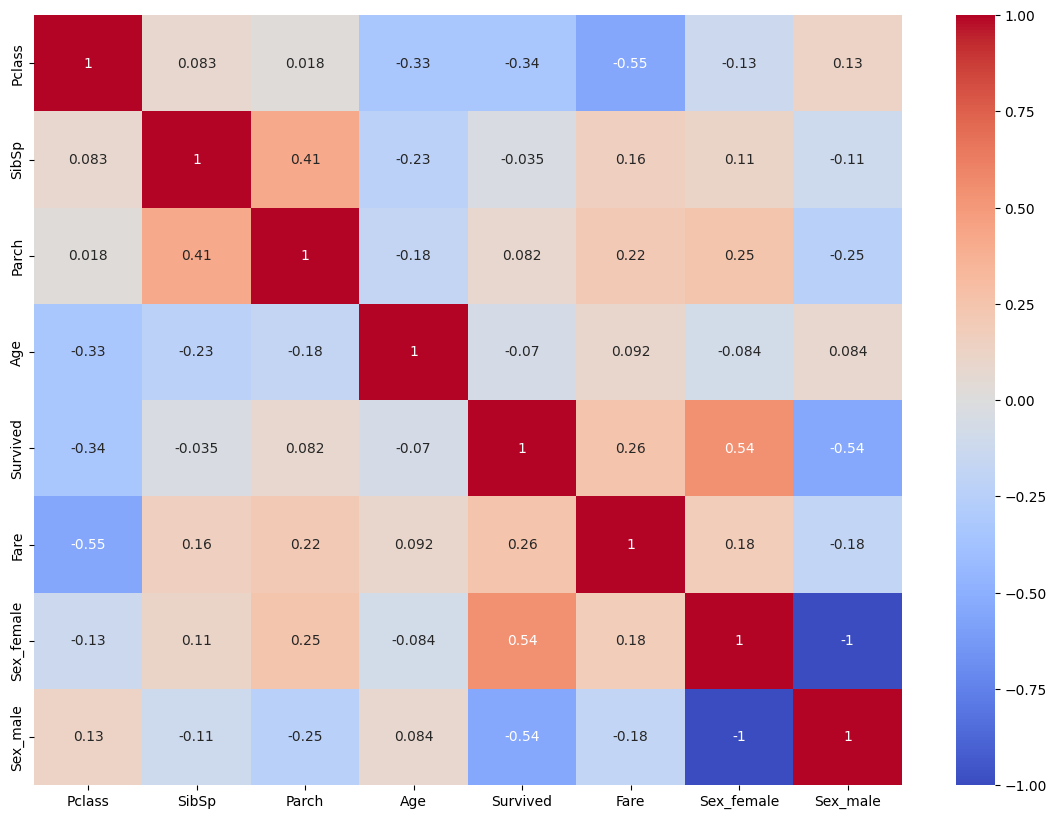

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
correlation_matrix = X2.corr()
plt.figure(figsize = (14,10))
sns.heatmap(correlation_matrix ,annot = True,cmap = 'coolwarm')
##in this case the correlation matrix helps by allowing us to understand the linear relationship between features and how they affect the outcome 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


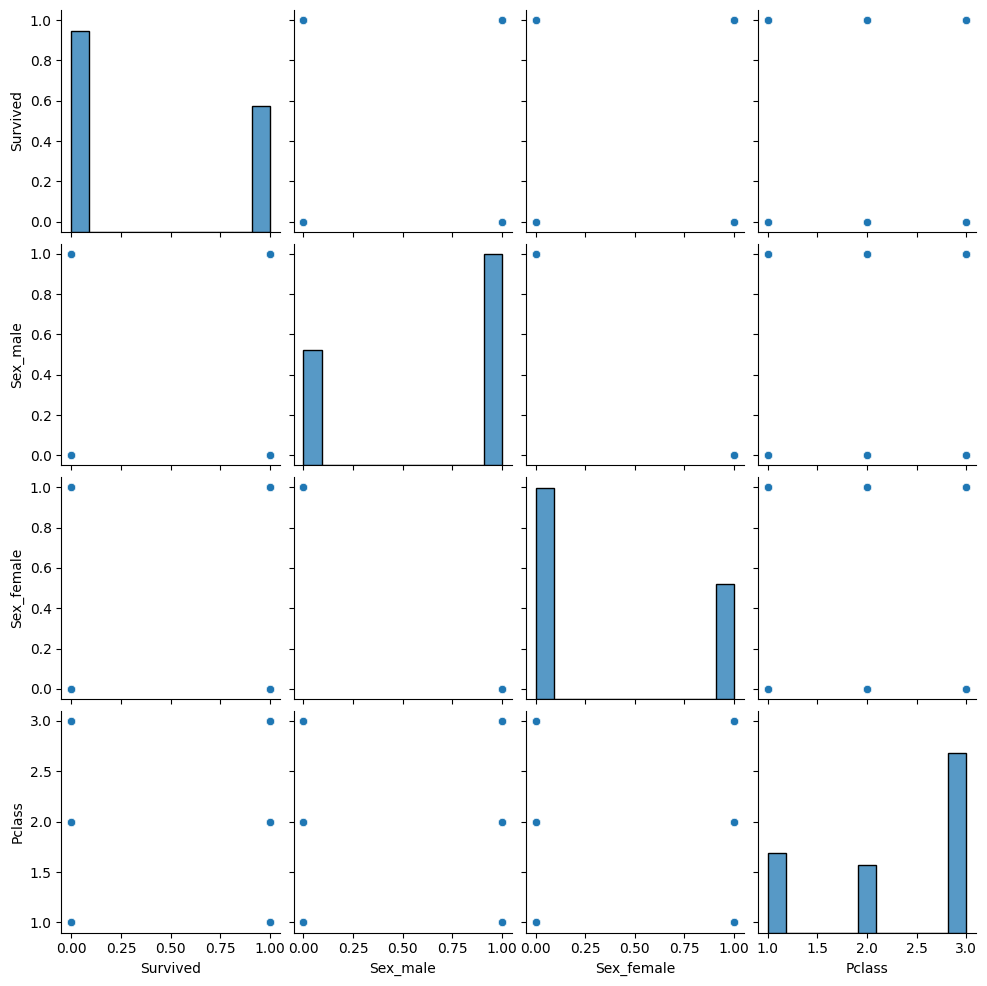

In [10]:
##using pairplot functionality of seaborn
sns.pairplot(X2[['Survived', 'Sex_male', 'Sex_female' , 'Pclass']])
plt.show()

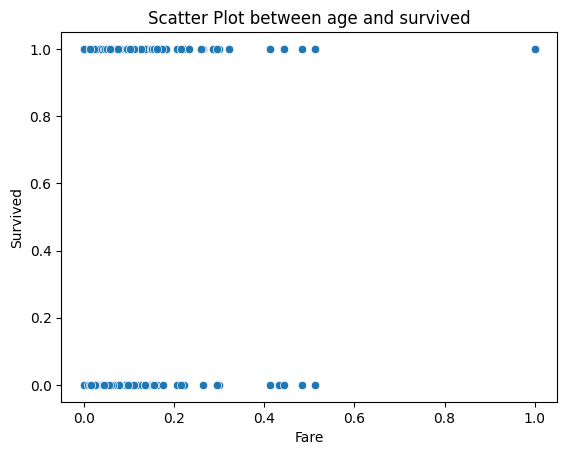

In [11]:
#scatter plot between some features
sns.scatterplot(x='Fare', y='Survived', data=train_data)
plt.title('Scatter Plot between age and survived')
plt.show()

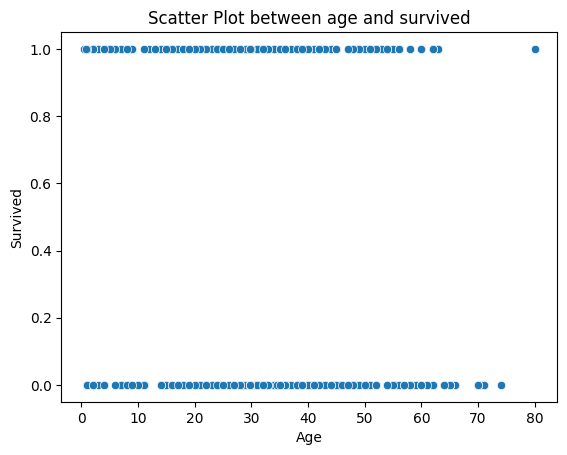

In [12]:
sns.scatterplot(x='Age', y='Survived', data=train_data)
plt.title('Scatter Plot between age and survived')
plt.show()

In [13]:
##outlier cropping of age (70 k upar waale hata do )
#outlier cropping of fare ; try removing upper limit 


In [14]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [15]:

print("*************************************************************************************")

model = RandomForestClassifier(n_estimators = 200, max_depth =5 , random_state=1)
#n_estimators control the number of trees in the random forest 
#max_depth controls the number of levels in each tree, assign 5 or about 5 to avoid overfitting , 
#try using bootstrap = true in the future and see what happens ; a bootstrap sample is one derived from the main sample at random ,and increases the model's unerstanding for making predictions 
#based on unknown data . since data in bootstrap samples is taken at random ,we might see data repitition or some aspects of data not being accounted for at all 
#example :Let's say you want to estimate the average height of people in a city. Instead of measuring the height of every person, you take multiple bootstrap samples from a smaller group of people. Each sample represents a subset of the population.
#By calculating the average height in each bootstrap sample, you can get an idea of the variability in your estimate.
#also try using class_weight , which allows for weaker classes (lower amount of data) which might have a stronger influence on the model's predictions from being neglected, we can do so by simply increasing the weight of htat particular class  

model.fit(X,y)
predictions = model.predict(X_test)
output = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv',index = False)
print("Your submission was saved")


*************************************************************************************
Your submission was saved
